#PHÂN LOẠI NHÀ Ở PARIS (PHÁP)


#Thư viện Python

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve

#Đọc và phân tích dữ liệu



In [434]:
df = pd.read_csv("/content/ParisHousingClass.csv")


In [435]:
#hiển thị 10 dòng đầu tiên
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2,Basic
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5,Luxury
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1,Basic


In [436]:
#hiển thị các thông tin mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

**Đếm các dòng dữ liệu của thuộc tính**



In [437]:
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
squareMeters,9483
numberOfRooms,100
hasYard,2
hasPool,2
floors,100
cityCode,9509
cityPartRange,10
numPrevOwners,10
made,32
isNewBuilt,2


In [438]:
# Shuffle the data
# Trộn dữ liệu
from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop=True)

In [439]:
#hiển thị 10.000 dòng dữ liệu gốc và 18 thuộc tính
print("Dữ liệu gốc và thuộc tính:", df.shape)

Dữ liệu gốc và thuộc tính: (10000, 18)


In [440]:
#Xem classification
df['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

#Liệt kê các thuộc tính

Nhận xét:


1.   Lớp Basic có 8735 dòng dữ liệu
2.   Lớp luxury có 1265 dòng dữ liệu



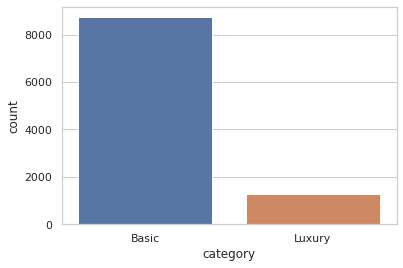

In [441]:
#đếm số lượng nhà basic and luxury
sns.countplot( x = df['category'])
# fig.savefig('report_category.png')

Tập dữ liệu của thuộc tính Category này bao gôm hai lớp Basic và Luxury này không cân bằng

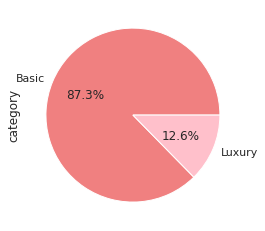

In [442]:
round(df['category'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])
# fig.savefig('report_category_circle.png')

Biểu đố thể hiện phần trăm, cho thấy rõ thuộc tính không cân bằng

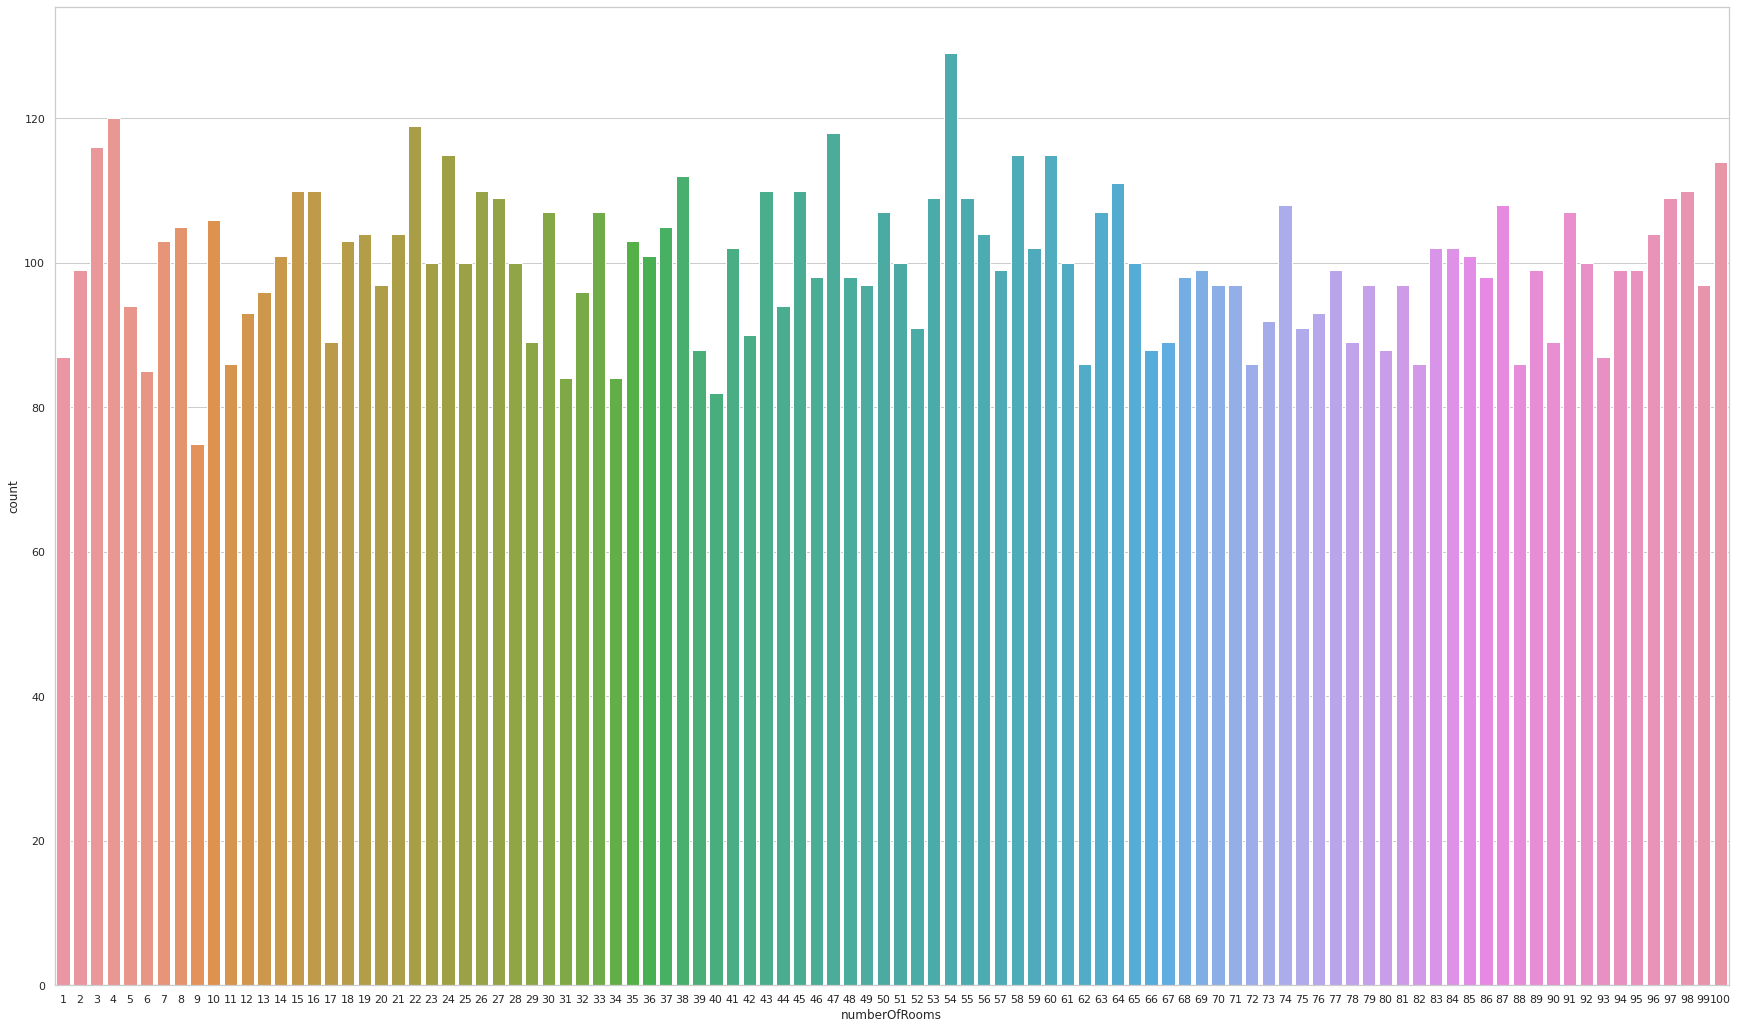

In [443]:
#đếm số lượng nhà basic and luxury
plt.figure(figsize=(30, 18))
sns.countplot( x = df['numberOfRooms'])
# fig.savefig('report_numberOfRooms.png')

In [444]:
#hiển thị 10 dòng dữ liệu đầu tiên
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,60250,79,1,0,16,37239,4,1,2019,1,1,8429,899,149,1,2,6031090.9,Basic
1,50877,87,1,1,89,10814,1,10,2002,0,1,9927,238,831,0,5,5097460.2,Basic
2,65546,74,1,0,21,48157,2,8,2011,1,0,1708,6526,585,0,0,6559358.1,Basic
3,56013,46,1,1,64,50170,8,6,2000,1,1,6404,6739,998,1,8,5611203.0,Luxury
4,11987,48,1,0,53,34594,9,4,2018,1,0,7342,5115,150,1,1,1203183.8,Basic
5,86045,10,0,0,14,55043,2,7,2021,1,1,4118,5664,554,1,2,8605790.1,Basic
6,33055,10,0,1,12,63073,7,3,1990,1,0,1856,2969,713,0,4,3308068.0,Basic
7,53629,57,1,1,9,77081,3,8,1992,0,1,2160,4764,317,0,10,5366623.2,Basic
8,79025,88,1,0,42,51700,8,9,2014,0,0,750,6689,728,1,7,7908018.4,Basic
9,26223,35,1,1,8,53223,3,6,2014,1,1,1084,7324,195,0,5,2630045.4,Luxury


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [446]:
df.duplicated().sum()

0

Dữ liệu không bị trùng lặp

In [447]:
#Hiển thị thuộc tính các cột trong data
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


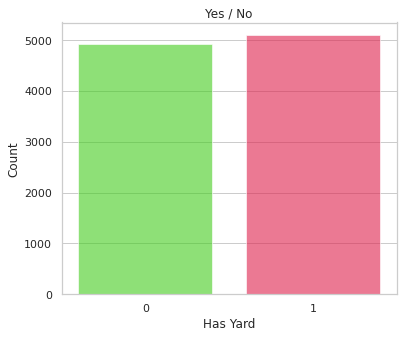

In [448]:
#Visualize mô hình đếm sân vườn 
count = df['hasYard'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Has Yard', fontsize=12)
plt.title('Yes / No')
plt.show()
# fig.savefig('report_hasYard.png')

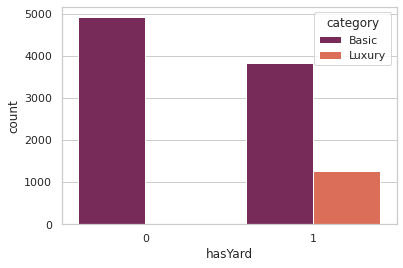

In [449]:
sns.countplot(x = df["hasYard"], hue=df["category"],palette="rocket")
# fig.savefig('report_hasYard_category.png')

In [450]:
#Chúng tôi lưu ý rằng tất cả các căn hộ sang trọng phải có sân, nhưng không phải tất cả các căn hộ có sân là sang trọng
pd.crosstab(df['category'], df['hasYard'], margins=True).style.background_gradient(cmap="PuBuGn")

hasYard,0,1,All
category,,,
Basic,4913,3822,8735
Luxury,0,1265,1265
All,4913,5087,10000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


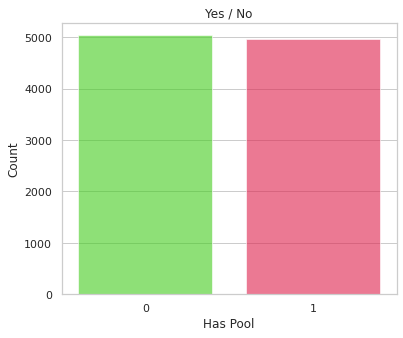

In [451]:
#Visualize mô hình đếm hồ bơi
count = df['hasPool'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Has Pool', fontsize=12)
plt.title('Yes / No')
plt.show()
# fig.savefig('report_hasPool.png')

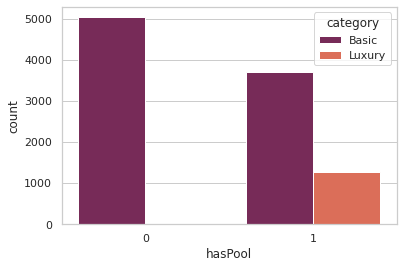

In [452]:
sns.countplot(x = df["hasPool"], hue=df["category"],palette="rocket")
# fig.savefig('report_hasPool_category.png')

In [453]:
#Chúng tôi lưu ý rằng tất cả các căn hộ sang trọng đều phải có hồ bơi, nhưng không phải tất cả các căn hộ có hồ bơi đều sang trọng
pd.crosstab(df['category'], df['hasPool'], margins=True).style.background_gradient(cmap="PuBuGn")

hasPool,0,1,All
category,,,
Basic,5032,3703,8735
Luxury,0,1265,1265
All,5032,4968,10000


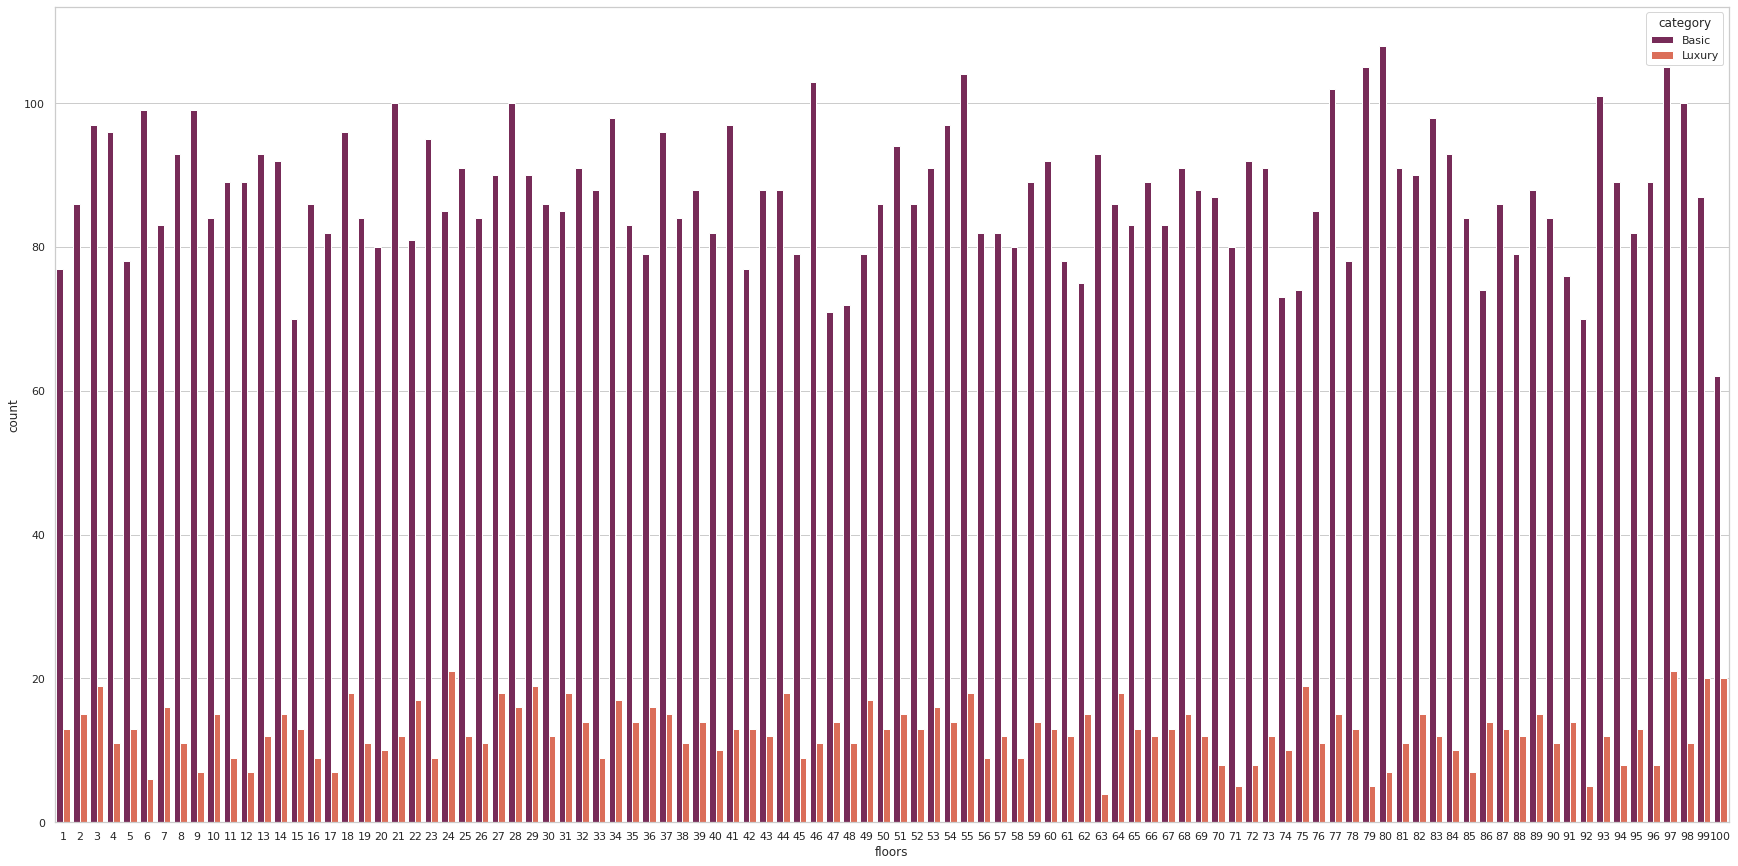

In [454]:
plt.figure(figsize=(30,15))
sns.countplot(x = df["floors"], hue=df["category"],palette="rocket")
# fig.savefig('report_floors.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


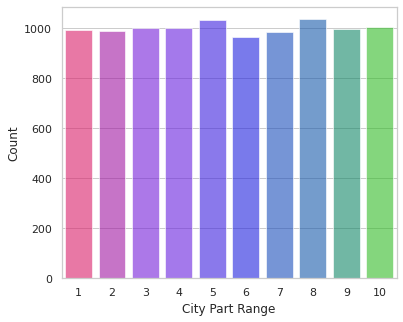

In [455]:
#Visualize mô hình số vùng lân cận
count = df['cityPartRange'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('City Part Range', fontsize=12)
plt.show()
# fig.savefig('report_cityPartRange.png')

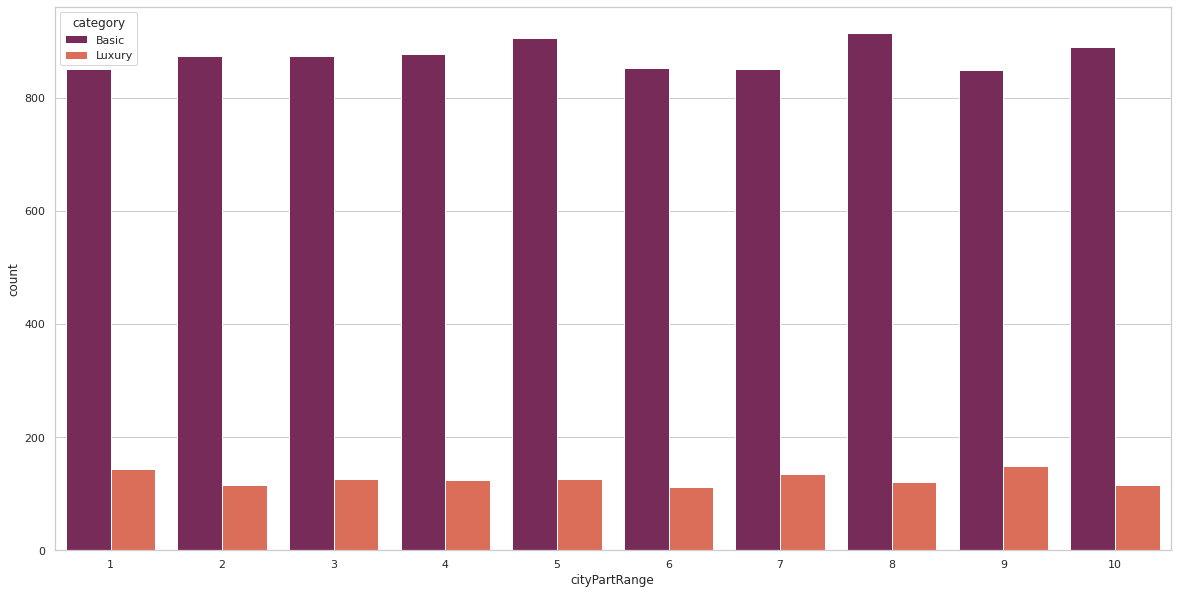

In [456]:
plt.figure(figsize=(20,10))
sns.countplot(x = df["cityPartRange"], hue=df["category"],palette="rocket")
# fig.savefig('report_cityPartRange_category.png')

In [457]:
pd.crosstab(df['category'], df['cityPartRange'], margins=True).style.background_gradient(cmap="PuBuGn")

cityPartRange,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,851,874,873,877,905,853,850,915,848,889,8735
Luxury,143,116,126,124,126,112,134,120,149,115,1265
All,994,990,999,1001,1031,965,984,1035,997,1004,10000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


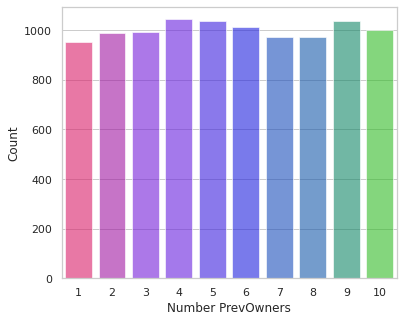

In [458]:
#Visualize mô hình số lượng chủ sở hữu
count = df['numPrevOwners'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number PrevOwners', fontsize=12)
plt.show()
# fig.savefig('report_numPrevOwners.png')

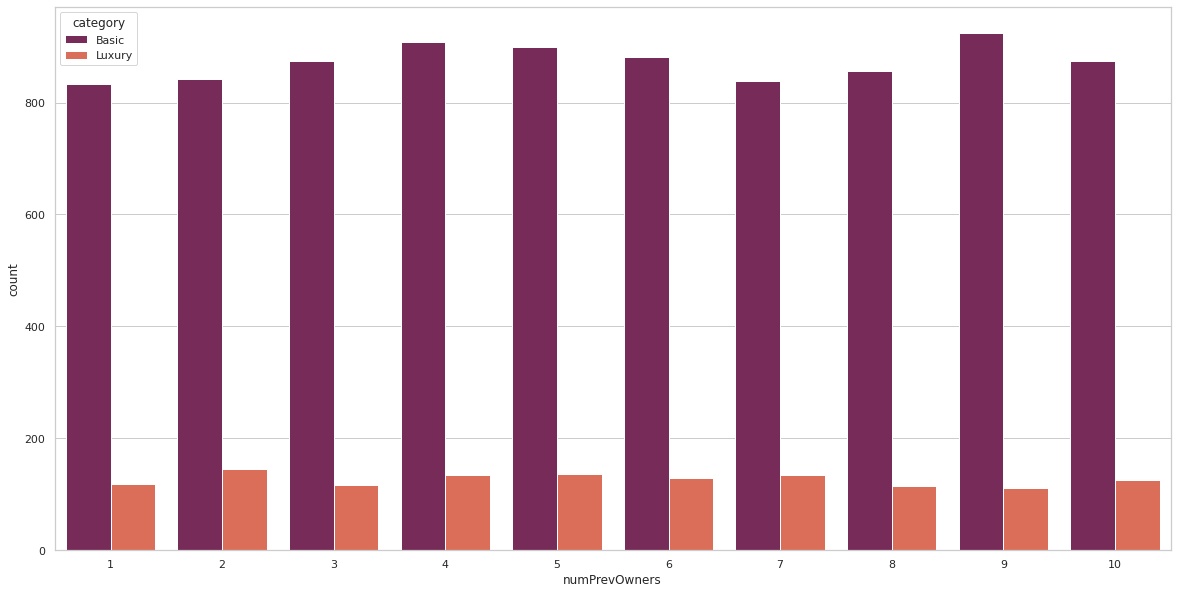

In [459]:
plt.figure(figsize=(20,10))
sns.countplot(x = df["numPrevOwners"], hue=df["category"],palette="rocket")
# fig.savefig('report_numPrevOwners_category.png')

In [460]:
pd.crosstab(df['category'], df['numPrevOwners'], margins=True).style.background_gradient(cmap="PuBuGn")

numPrevOwners,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,834,842,874,909,900,882,839,856,925,874,8735
Luxury,118,145,117,134,136,129,135,115,111,125,1265
All,952,987,991,1043,1036,1011,974,971,1036,999,10000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


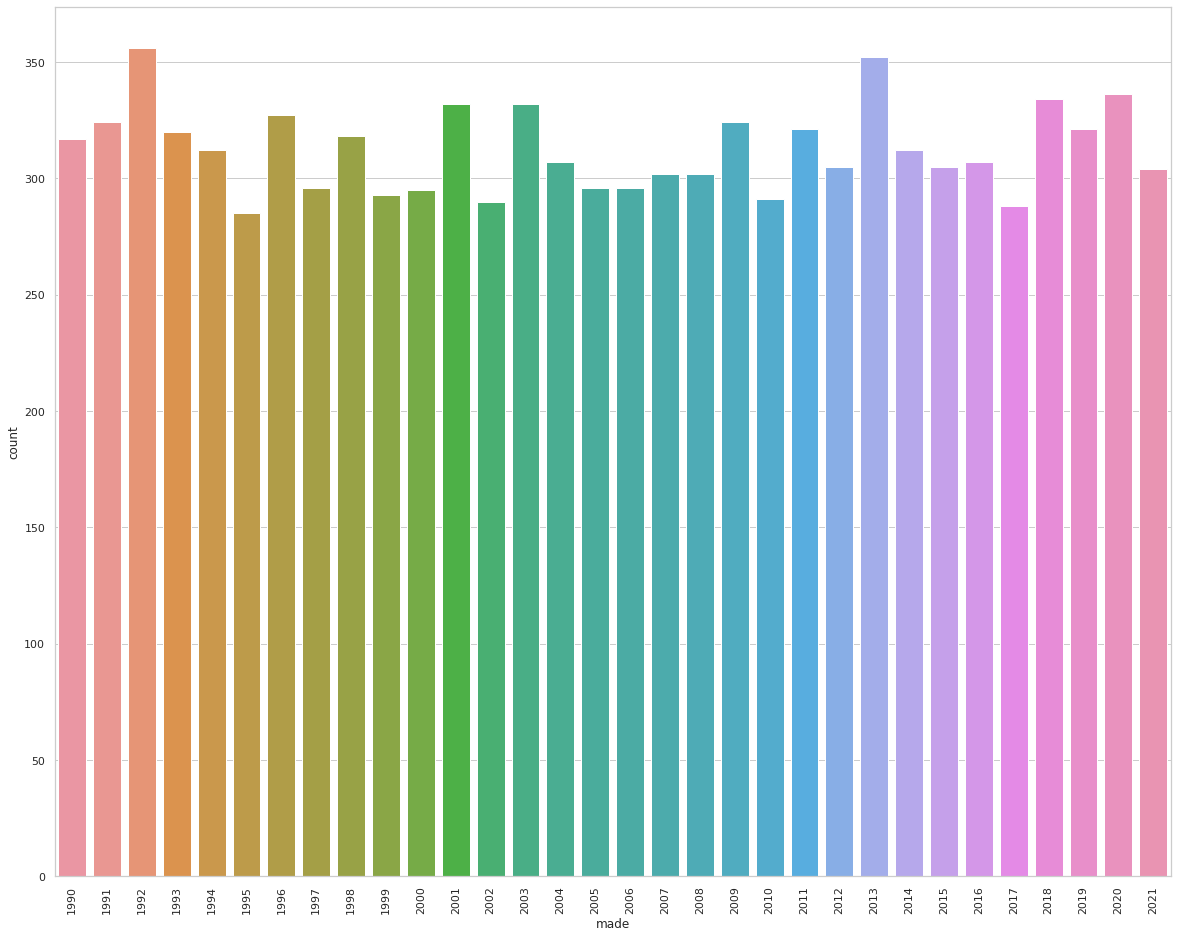

In [461]:
plt.figure(figsize=(20,16))
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 9)
sns.countplot(df['made'])
plt.xticks(rotation=90)
plt.show()
# fig.savefig('report_made.png')

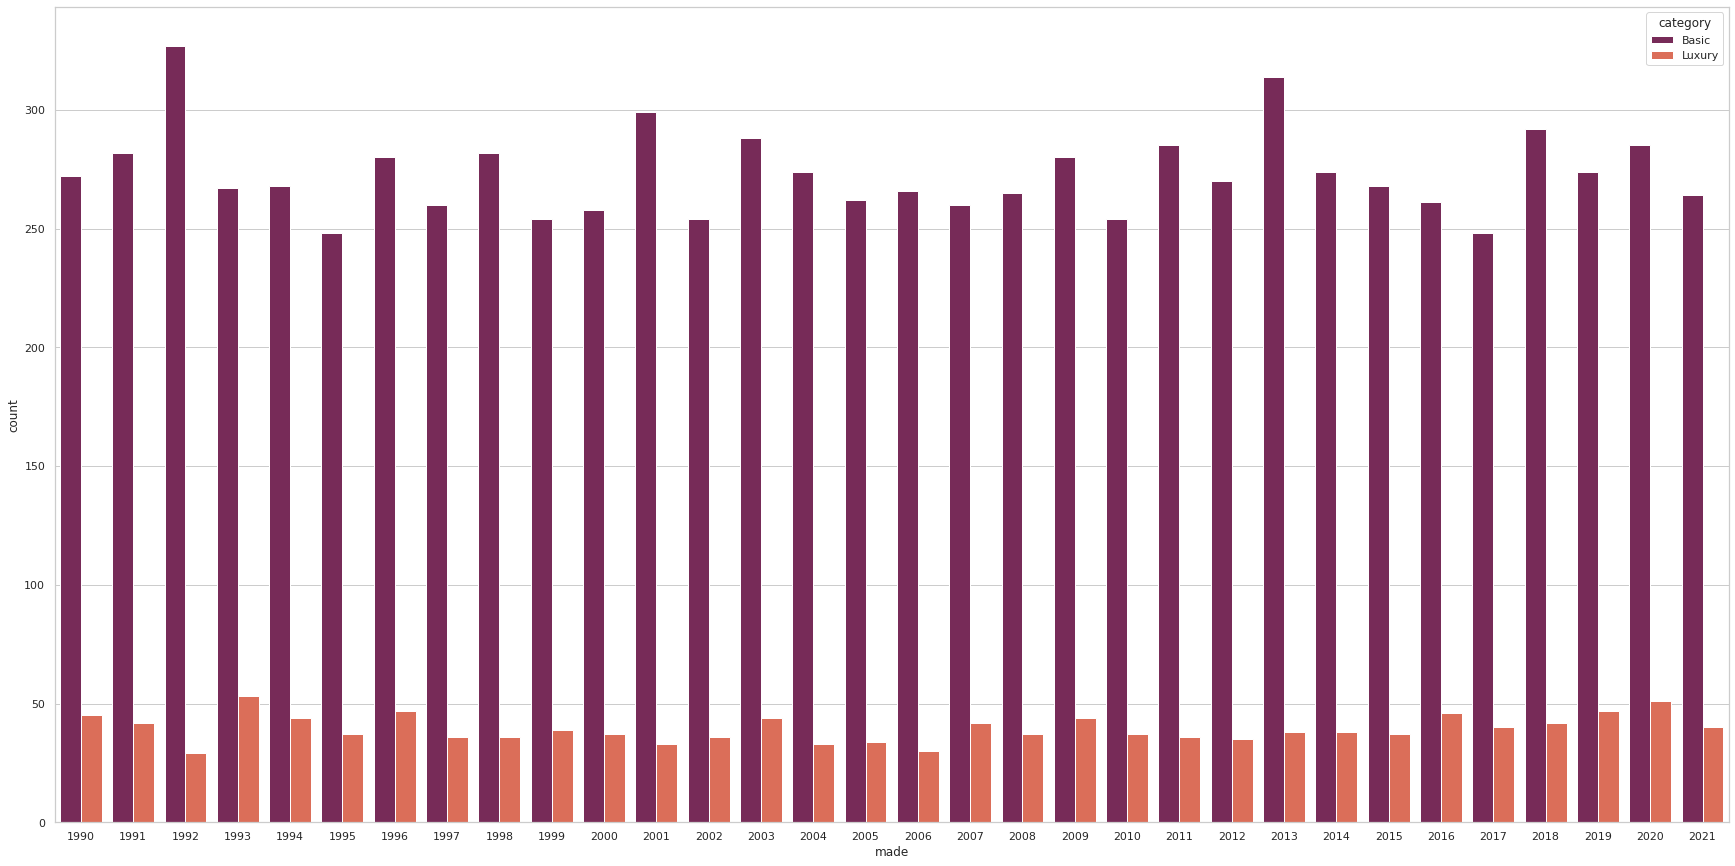

In [462]:
plt.figure(figsize=(30,15))
sns.countplot(x = df["made"], hue=df["category"],palette="rocket")
# fig.savefig('report_made_category.png')

In [463]:
pd.crosstab(df['category'], df['made'], margins=True).style.background_gradient(cmap="PuBuGn")

made,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Basic,272,282,327,267,268,248,280,260,282,254,258,299,254,288,274,262,266,260,265,280,254,285,270,314,274,268,261,248,292,274,285,264,8735
Luxury,45,42,29,53,44,37,47,36,36,39,37,33,36,44,33,34,30,42,37,44,37,36,35,38,38,37,46,40,42,47,51,40,1265
All,317,324,356,320,312,285,327,296,318,293,295,332,290,332,307,296,296,302,302,324,291,321,305,352,312,305,307,288,334,321,336,304,10000


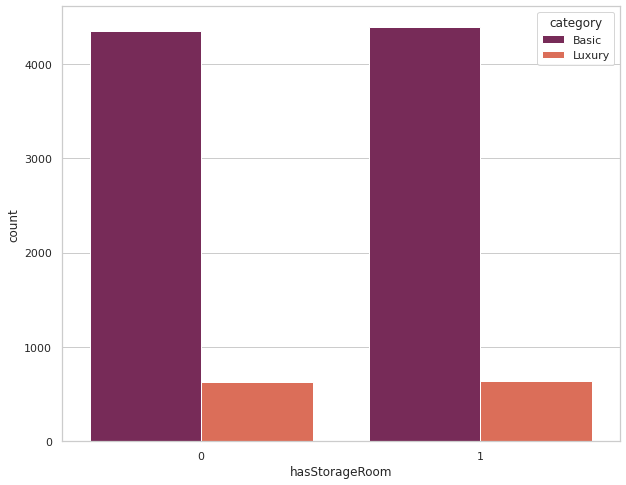

In [464]:

plt.figure(figsize=(10,8))
sns.countplot(x = df["hasStorageRoom"], hue=df["category"],palette="rocket")
# fig.savefig('report_hasStorageRoom_category.png')

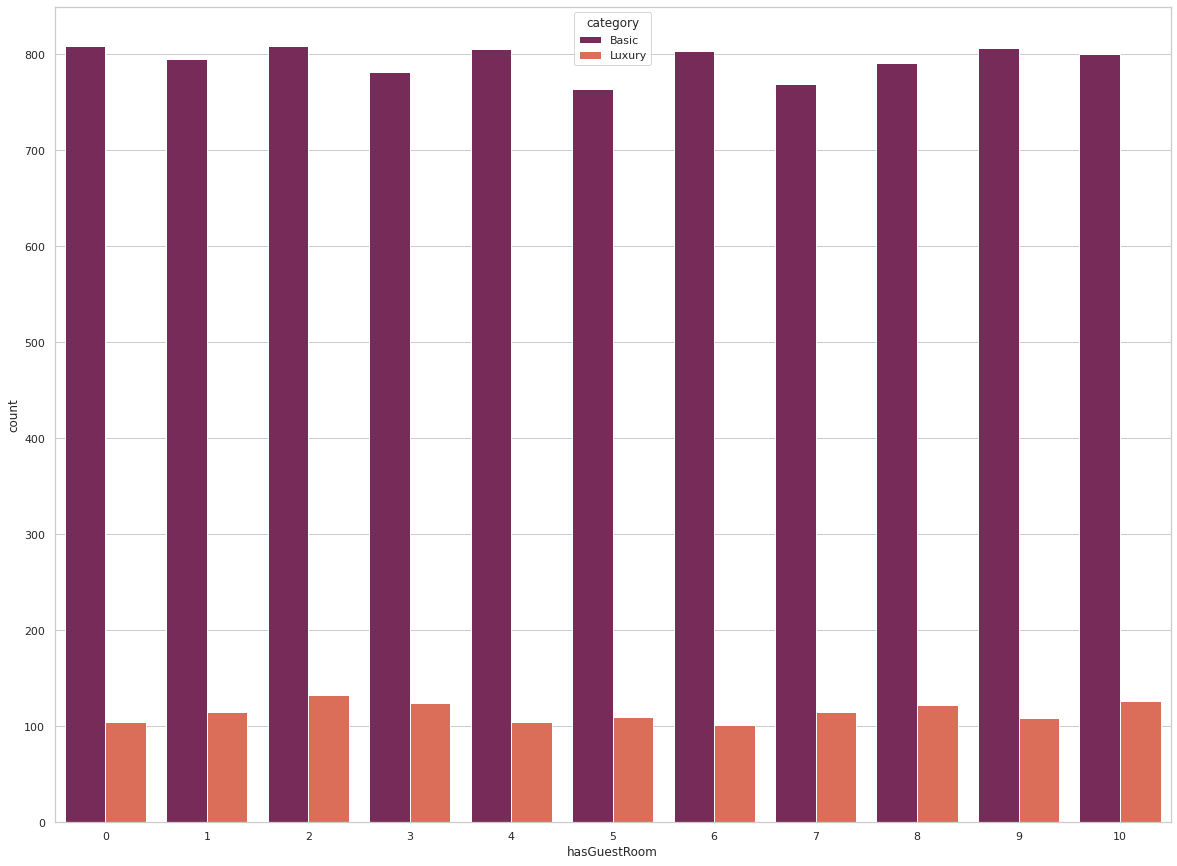

In [465]:

plt.figure(figsize=(20,15))
sns.countplot(x = df["hasGuestRoom"], hue=df["category"],palette="rocket")
# fig.savefig('report_hasGuestRoom_category.png')

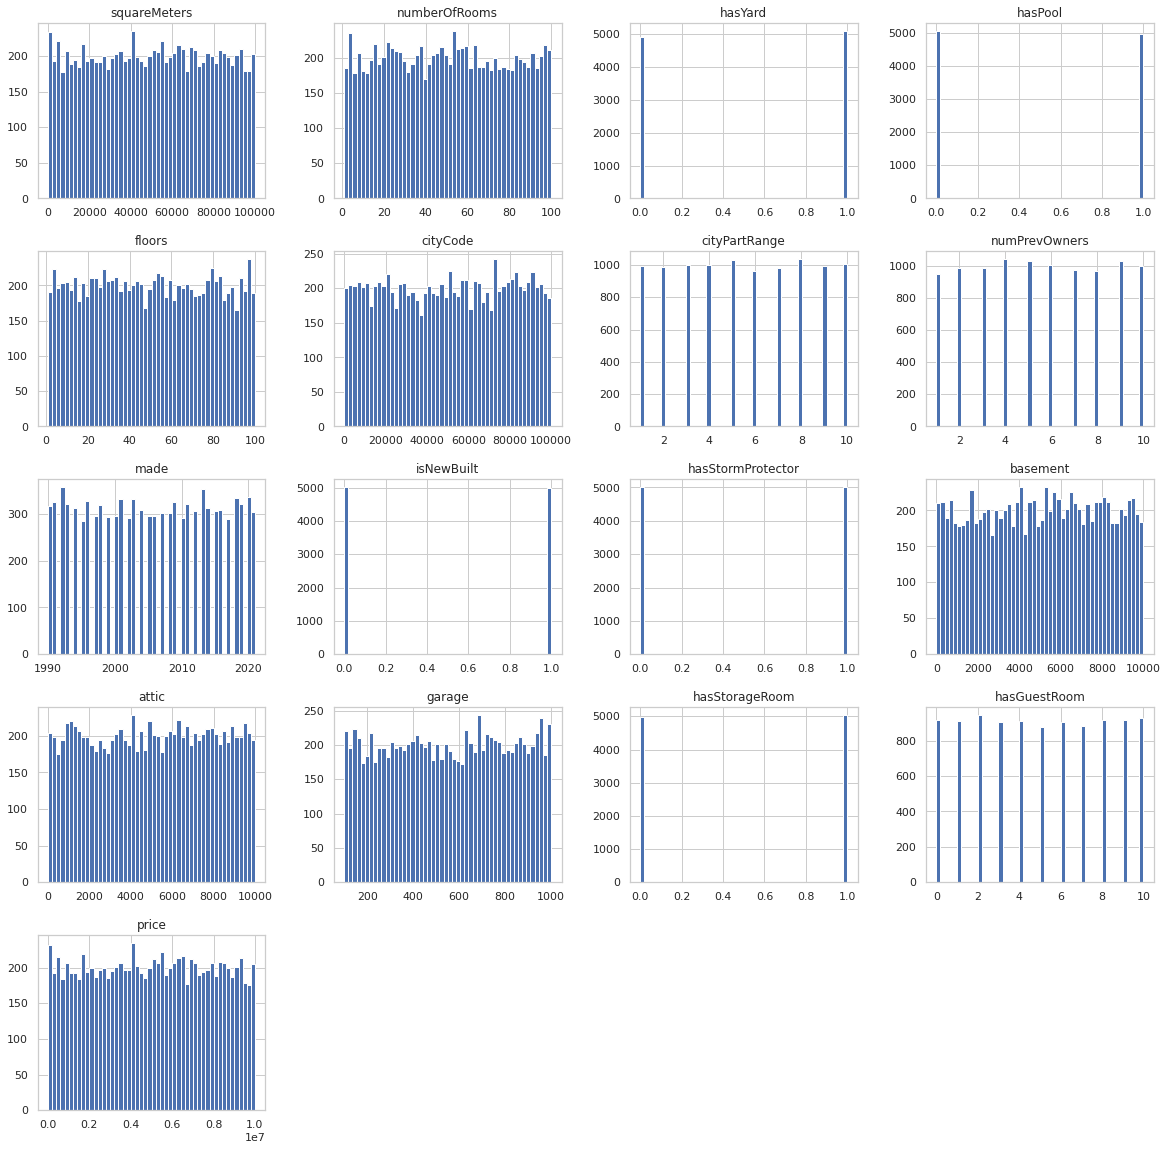

In [466]:
df.hist(bins = 50, figsize = (20,20))
plt.show()
# fig.savefig('report_all.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


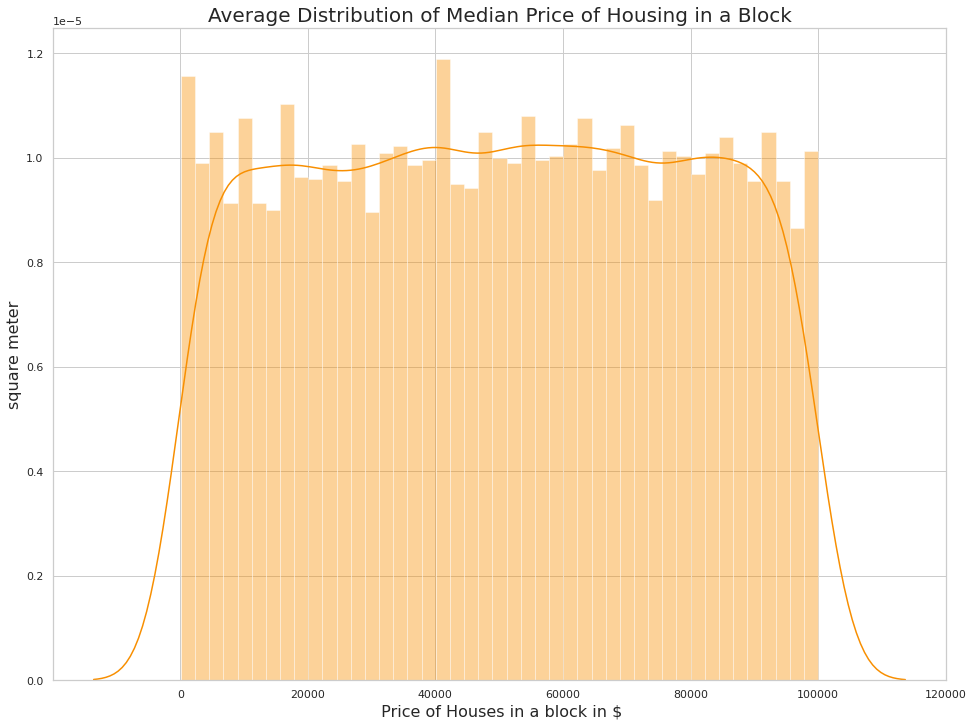

In [467]:
#Giá cả và mét vuông phụ thuộc vào nhau
plt.figure(figsize=(16, 12))
sns.distplot(df.squareMeters, bins = 45, color = '#f88f01', hist = True)
plt.xlabel(' Price of Houses in a block in $', fontsize=16)
plt.ylabel('square meter', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=20)
plt.show()
# fig.savefig('report_price_squaremeter.png')

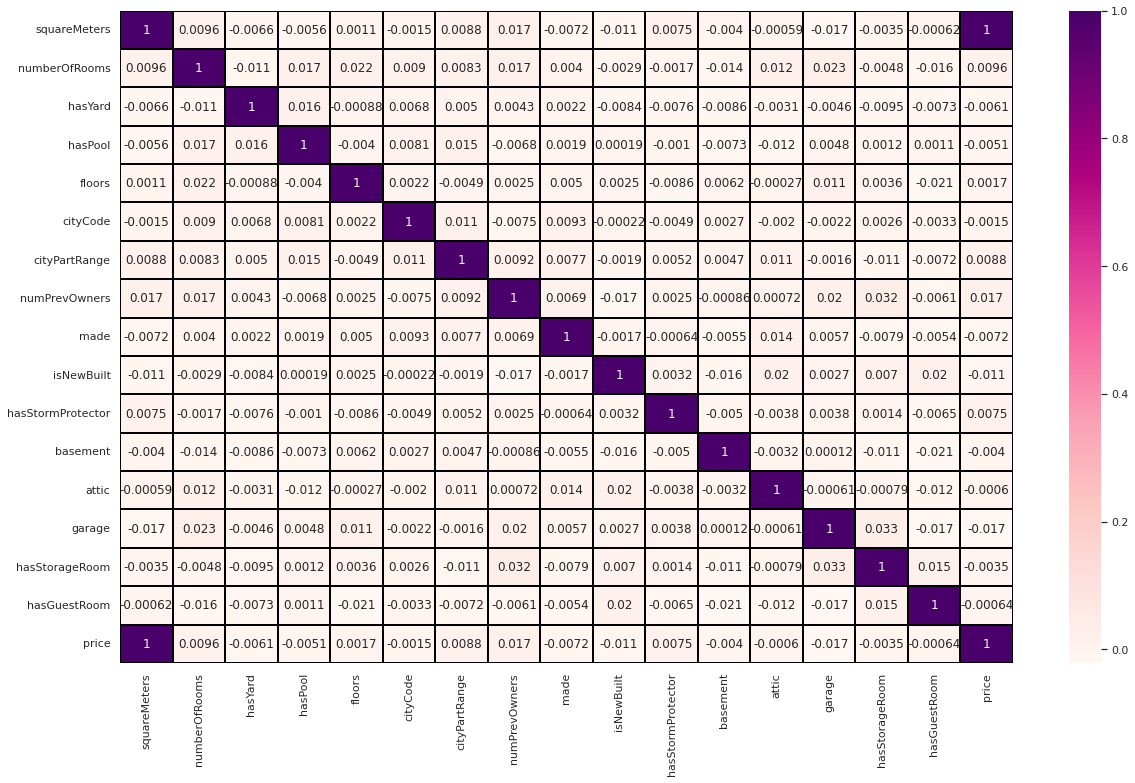

In [468]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')
# fig.savefig('heatmap_1.png')

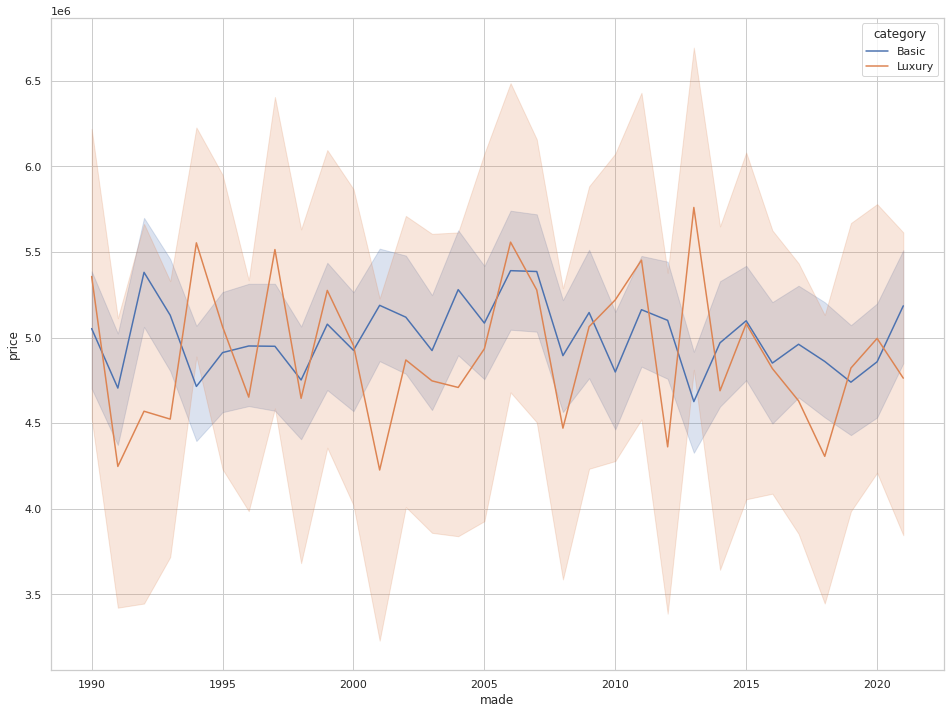

In [469]:
#Mối quan hệ giữa năm thực hiện và giá cả cho cả hai loại
plt.figure(figsize=(16, 12))
sns.lineplot(x = df["made"], y = df["price"] , hue = df["category"])
# fig.savefig('report_price_made.png')

In [470]:
#Biến đổi chữ thành số của thuộc tính caterogy
df['category'].replace("Basic", 0 , inplace = True)
df['category'].replace("Luxury", 1 , inplace = True)

In [471]:
#xem lại dữ liệu sau khi mã hóa
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


In [472]:
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,60250,79,1,0,16,37239,4,1,2019,1,1,8429,899,149,1,2,6031090.9,0
1,50877,87,1,1,89,10814,1,10,2002,0,1,9927,238,831,0,5,5097460.2,0
2,65546,74,1,0,21,48157,2,8,2011,1,0,1708,6526,585,0,0,6559358.1,0
3,56013,46,1,1,64,50170,8,6,2000,1,1,6404,6739,998,1,8,5611203.0,1
4,11987,48,1,0,53,34594,9,4,2018,1,0,7342,5115,150,1,1,1203183.8,0
5,86045,10,0,0,14,55043,2,7,2021,1,1,4118,5664,554,1,2,8605790.1,0
6,33055,10,0,1,12,63073,7,3,1990,1,0,1856,2969,713,0,4,3308068.0,0
7,53629,57,1,1,9,77081,3,8,1992,0,1,2160,4764,317,0,10,5366623.2,0
8,79025,88,1,0,42,51700,8,9,2014,0,0,750,6689,728,1,7,7908018.4,0
9,26223,35,1,1,8,53223,3,6,2014,1,1,1084,7324,195,0,5,2630045.4,1


In [473]:
#Kiểm tra giá so với mét vuông
#a
df['price']/df['squareMeters']
#vì vậy sẽ xóa thuộc tính mét vuông hoặc giá cả

0       100.101094
1       100.191839
2       100.072592
3       100.176798
4       100.374055
           ...    
9995    101.430431
9996    100.166971
9997    100.187573
9998    100.180181
9999    100.200845
Length: 10000, dtype: float64

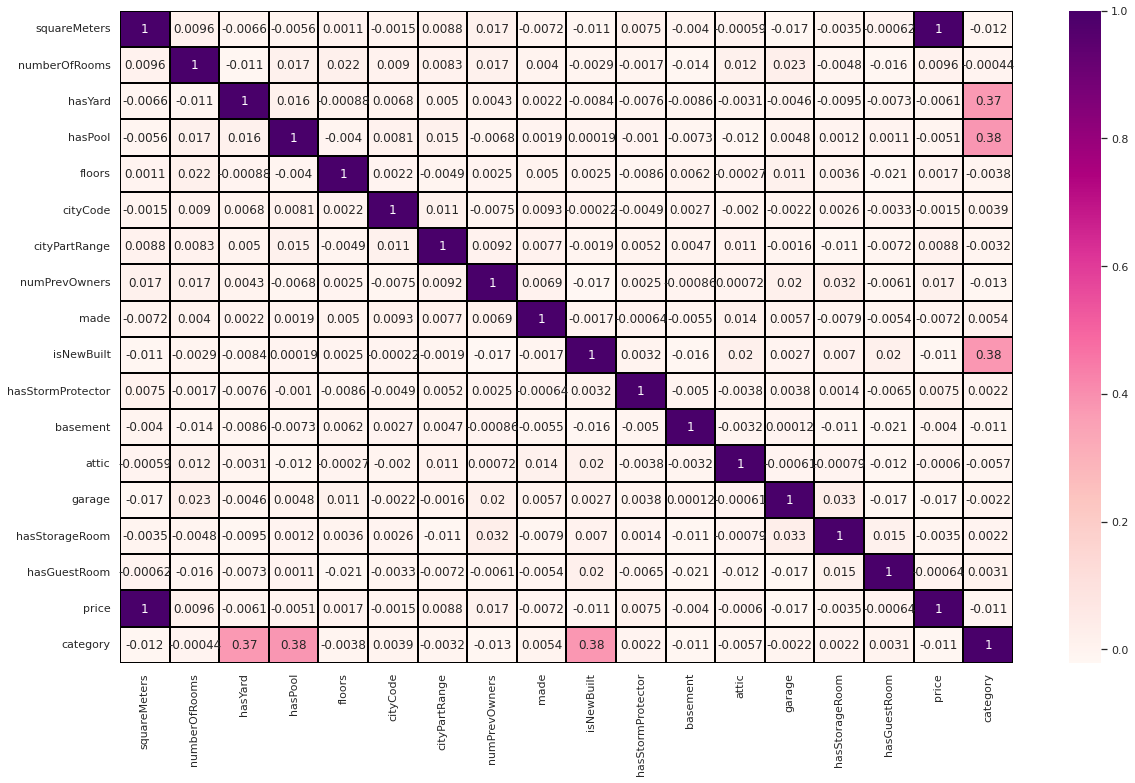

In [474]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')
# fig.savefig('heatmap_1.png')

In [475]:
#Sẽ chọn giá để xóa
df = df.drop(["price"], axis = 1)

In [476]:
df.info()
#Sau khi xóa xong thuộc tính price, sẽ còn lại 17 thuộc tính trong tập dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       10000 non-null  int64
 1   numberOfRooms      10000 non-null  int64
 2   hasYard            10000 non-null  int64
 3   hasPool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   cityCode           10000 non-null  int64
 6   cityPartRange      10000 non-null  int64
 7   numPrevOwners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isNewBuilt         10000 non-null  int64
 10  hasStormProtector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasStorageRoom     10000 non-null  int64
 15  hasGuestRoom       10000 non-null  int64
 16  category           10000 non-null  int64
dtypes: int64(17)


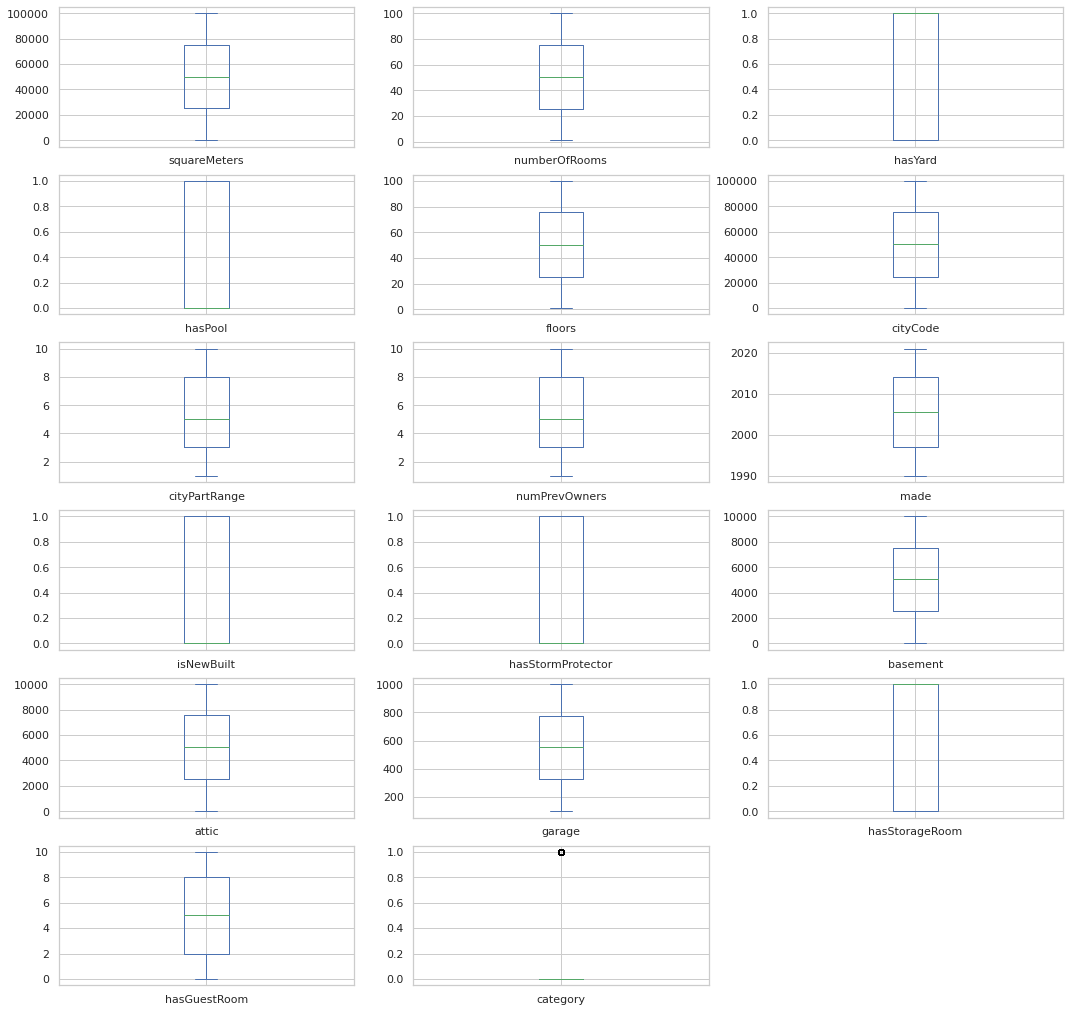

In [477]:
#Kiểm tra ngoại lệ không
# Hầu như không có ngoại lệ, ngoại trừ trong category
# vì căn hộ sang trọng chiếm thiểu số (khoảng 12,6%)
df.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()
# fig.savefig('report_all_1.png')

Lấy mẫu dữ liệu để ngang bằng với hàng luxury

In [478]:
luxury = df[df['category']==1]
luxury
#lấy tất cả hàng luxury

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
3,56013,46,1,1,64,50170,8,6,2000,1,1,6404,6739,998,1,8,1
9,26223,35,1,1,8,53223,3,6,2014,1,1,1084,7324,195,0,5,1
11,75132,70,1,1,89,43424,1,10,2006,1,1,5778,3679,321,0,4,1
17,82131,3,1,1,73,19368,7,7,2002,1,1,1908,4359,714,0,5,1
18,24743,50,1,1,88,98241,5,1,1996,1,0,8360,6076,664,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,94981,43,1,1,68,83239,1,4,2015,1,1,4133,3224,814,1,2,1
9960,42808,33,1,1,67,32715,10,2,1996,1,0,8536,3106,855,0,5,1
9972,6481,86,1,1,60,13724,10,10,2017,1,1,3579,325,517,1,9,1
9978,57337,55,1,1,97,85366,1,6,1992,1,0,4797,2014,438,0,3,1


In [479]:
luxury.shape
#Hàng luxury có 1265 dòng dữ liệu và 17 thuộc tính

(1265, 17)

In [480]:
basic = df[df['category']==0].sample(1265)
basic
#Lấy hàng basic ngang bằng với dòng dữ liệu luxury là 1265 để tiến hành train data và test data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
3031,15262,49,0,1,72,20893,2,7,2005,0,1,6000,293,884,0,1,0
3438,11904,59,0,1,55,79610,4,2,1993,1,0,9794,4214,813,1,3,0
1958,57530,72,0,1,2,58310,9,6,2001,1,0,3187,5589,399,0,5,0
4322,6547,93,0,0,20,70033,2,7,2021,0,0,719,1178,884,1,7,0
8804,61869,96,0,0,3,13257,2,2,2013,0,1,6093,3800,343,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,96352,25,1,1,31,24492,9,8,2019,0,0,9789,1023,636,0,8,0
1149,63886,46,1,0,1,23324,7,8,1992,1,1,3896,2640,771,0,2,0
7289,18202,67,1,0,75,50682,10,3,2005,1,0,430,2294,758,1,7,0
4653,42078,4,1,1,9,51158,5,3,2005,0,0,8430,4723,185,0,6,0


Nhận xét: Có một mối tương quan lớn giữa giá và mét vuông. vì vậy, chúng tôi quyết định bỏ squareMeter để áp dụng mô hình

In [481]:
#Xóa SquareMeters 
df.drop(['squareMeters'], axis=1, inplace =True)
df

,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,79,1,0,16,37239,4,1,2019,1,1,8429,899,149,1,2,0
1,87,1,1,89,10814,1,10,2002,0,1,9927,238,831,0,5,0
2,74,1,0,21,48157,2,8,2011,1,0,1708,6526,585,0,0,0
3,46,1,1,64,50170,8,6,2000,1,1,6404,6739,998,1,8,1
4,48,1,0,53,34594,9,4,2018,1,0,7342,5115,150,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,0,1,70,27217,7,2,1998,1,0,1049,2100,301,1,3,0
9996,16,1,0,22,5859,3,5,2018,0,0,8821,4157,954,1,10,0
9997,59,0,1,23,95318,10,10,2006,0,0,1018,1776,420,1,8,0
9998,57,1,1,70,90234,2,5,1993,0,0,6027,4555,718,0,2,0


#Models

In [482]:
X =df.drop(['category'], axis = 1).values
y = df['category'].values

In [483]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [484]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#Decision Tree

In [485]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, max_features= 7)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

[Text(0.4375, 0.9166666666666666, 'X[2] <= 0.006\ngini = 0.22\nsamples = 7500\nvalue = [6555, 945]'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 3772\nvalue = [3772, 0]'),
 Text(0.5, 0.75, 'X[0] <= -1.67\ngini = 0.378\nsamples = 3728\nvalue = [2783, 945]'),
 Text(0.3125, 0.5833333333333334, 'X[11] <= 1.565\ngini = 0.163\nsamples = 56\nvalue = [51, 5]'),
 Text(0.25, 0.4166666666666667, 'X[11] <= -1.329\ngini = 0.135\nsamples = 55\nvalue = [51, 4]'),
 Text(0.125, 0.25, 'X[12] <= 0.163\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.25, 'X[4] <= 1.114\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue =

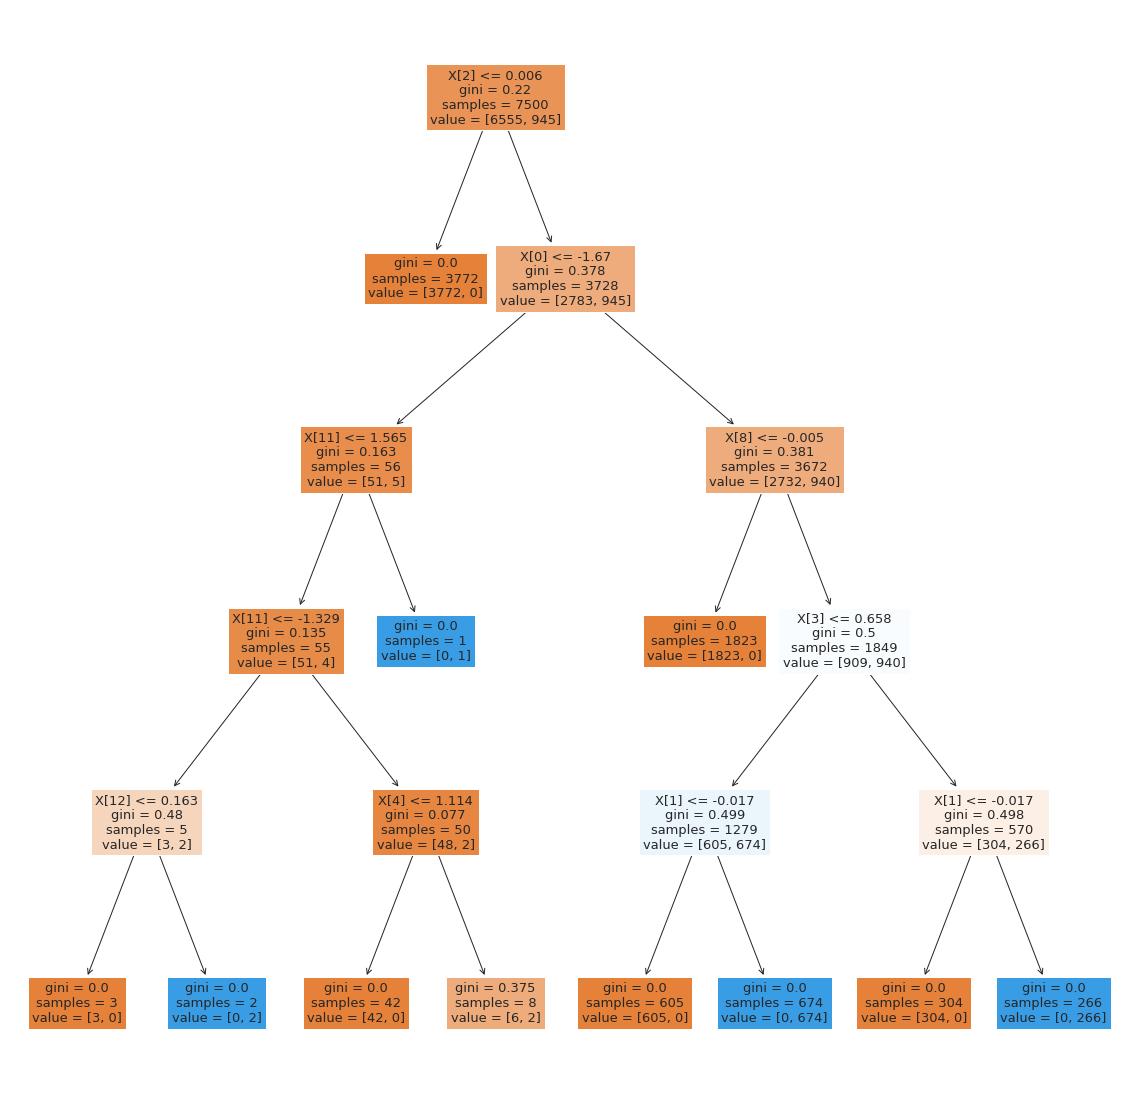

In [509]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize = (20,20))
tree.plot_tree(dt , filled = True)
# fig.savefig('decesion_tree.png')

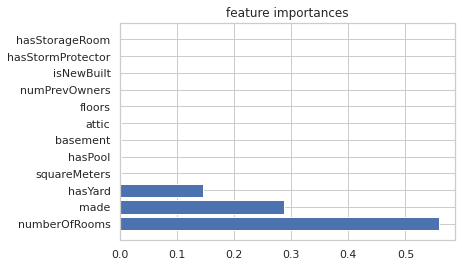

In [487]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Paris Housing
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price']

f_importances(abs(dt.feature_importances_), features_names, top=12)

In [488]:
print('TEST RESULT:\n ')
# REPORT
print('Decision tree Classifier Report:\n\n{} \n' .format(classification_report(y_test, dt_pred)))

res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

#Độ chính xác trung bình
print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, dt.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(dt.score( X_test, y_test)*100,2)))

TEST RESULT:
 
Decision tree Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2180
           1       0.98      0.98      0.98       320

    accuracy                           1.00      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500
 

Average Accucy: 	0.9600

Standard Deviation: 	0.0521

Confusion Matrix :
[[2173    7]
 [   5  315]]

Accuracy Score :		99.52%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


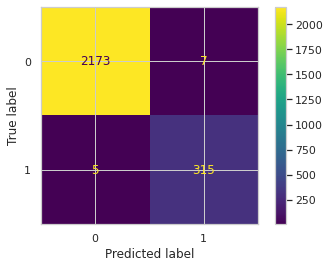

In [489]:
plot_confusion_matrix(dt, X_test, y_test)
# fig.savefig('matrix_dt.png')

#RANDOM FOREST

In [490]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [491]:
rf_pred = rf.predict(X_test)

In [492]:
print('TEST RESULT:\n ')
# REPORT
print('Random Forest Classifier report:\n\n{} \n' .format(classification_report(y_test, rf_pred)))

res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

#Độ chính xác trung bình
print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, rf.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(rf.score( X_test, y_test)*100,2)))

TEST RESULT:
 
Random Forest Classifier report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2180
           1       1.00      1.00      1.00       320

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500
 

Average Accucy: 	1.0000

Standard Deviation: 	0.0000

Confusion Matrix :
[[2180    0]
 [   0  320]]

Accuracy Score :		100.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


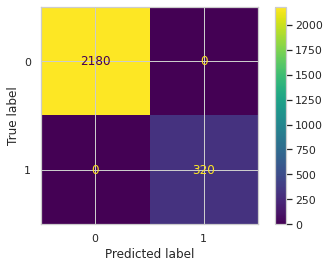

In [493]:
plot_confusion_matrix(rf, X_test, y_test)
# fig.savefig('matrix_rf.png')

In [494]:
print ('Train Accuracy - : {}%'.format(round(rf.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(rf.score( X_test, y_test)*100,2)))

Train Accuracy - : 100.0%
Test Accuracy - : 100.0%


#K-Nearest Neighbors

In [495]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [496]:
kn_pred = knn.predict(X_test)

In [497]:
from sklearn.model_selection import cross_val_predict, cross_val_score
print('TEST RESULT:\n ')
# REPORT
print(classification_report(y_test, kn_pred))

res = cross_val_score(knn, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

#Độ chính xác trung bình
print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, knn.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(knn.score( X_test, y_test)*100,2)))

TEST RESULT:
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2180
           1       1.00      0.98      0.99       320

    accuracy                           1.00      2500
   macro avg       1.00      0.99      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Average Accucy: 	0.9860

Standard Deviation: 	0.0074

Confusion Matrix :
[[2180    0]
 [   5  315]]

Accuracy Score :		99.8%


In [498]:
print ('Train Accuracy - : {}%'.format(round(knn.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(knn.score( X_test, y_test)*100,2)))

Train Accuracy - : 99.92%
Test Accuracy - : 99.8%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


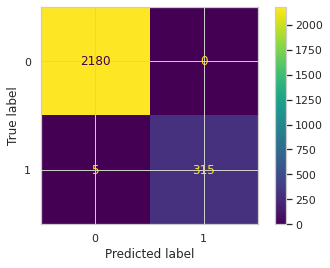

In [499]:
plot_confusion_matrix(knn, X_test, y_test)
# fig.savefig('matrix_knn.png')

In [500]:
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
# Loop over different values of k
for i, k in enumerate(n_neighbors):
# Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(k)
# Fit the classifier to the training data
 knn.fit(X_train, y_train)
 train_accuracy[i] = knn.score(X_train,y_train)
 test_accuracy[i] = knn.score(X_test, y_test)

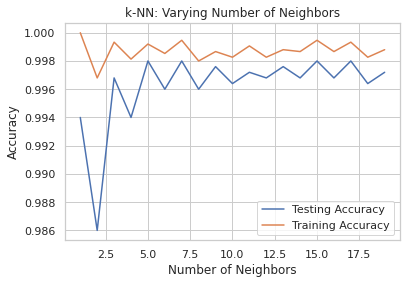

In [505]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [502]:
f1_score=accuracy_score
dt_f1 =f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, kn_pred)

RF_f1 = f1_score(y_test, rf_pred)

In [503]:
x=['Decision Tree','KNN','Random Forest']
y=[dt_f1,knn_f1,RF_f1]

<Figure size 1440x1440 with 0 Axes>

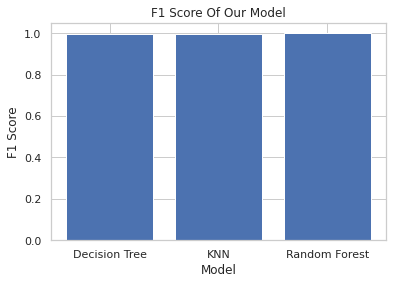

In [504]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(x, y, width=0.8)
plt.title('F1 Score Of Our Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()
# fig.savefig('dt_rf_knn.png')

#ROC Curves

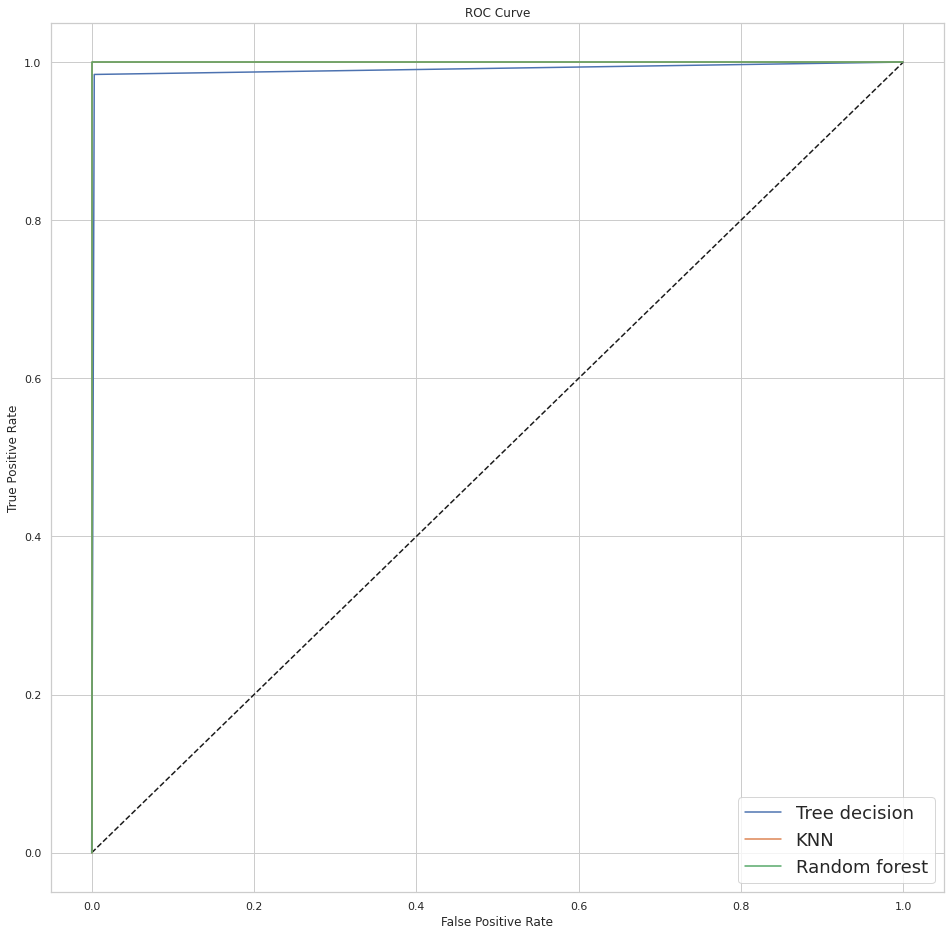

In [506]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

pred_prob = [y_pred_prob_dt,y_pred_prob_knn,y_pred_prob_rf]

# Generate ROC curve values: fpr, tpr, thresholds

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_dt)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_prob_knn)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(16,16))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label = 'Tree decision')
plt.plot(fpr_2, tpr_2, label = 'KNN')
plt.plot(fpr_3, tpr_3, label = 'Random forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')

plt.show()